$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Home Assignment 5 -- Clustering** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: K-means (Yuchong), GMM (Divya), EM (Divya)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Yuchong, Divya** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 29th May** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Fikri Farhan Witjaksono, 19950822-4756, fikrif@student.chalmers.se** <br />


---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question, but feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 8 points]

Q 1.1. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change. [**4 pts**]



Q 1.2. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration. [**4 pts**]

### Your answer here:

**Q.1.1** The euclidean distance can be defined mathematically as below

$$ d_{nk} = (x_{n}-\mu_{k})^{T}(x_{n}-\mu_{k})  $$

where each cluster is defined by a position in the input space :

$$ \mu_{k} = [\mu_{k1},\mu_{k2}]^{T}  $$

Initially, we guess $\mu_{1}$ as a uniformly random points from the data. And then we minimize the distance using

$$  \underset{d_{nk}}{\mathrm{argmin}} \sum_{n} \sum_{k} z_{nk}(x_{n}-\mu_{k})^{T}(x_{n}-\mu_{k})  $$

such that: 

$$z_{nk}\in\{0,1\},$$

$$ \sum_{k} z_{nk}=1$$

Then finding the new centroid from clustered group of points 

$$ W_{k} = \frac{1}{|C_{k}|}\sum_{x\in C_{k}}(x-\mu_{k})^{2} $$

After that, update $\mu_{k}$ to average $x_{n}s$ assigned to $\mu_{k}$ until assignment doesnt change.

Centroids at Convergence {0: array([-0.19532481, -0.20577421]), 1: array([1.81736022, 1.87257792])}
Centroids at 2nd iteration {0: array([-0.16751842, -0.22870248]), 1: array([1.74993924, 1.92817114])}


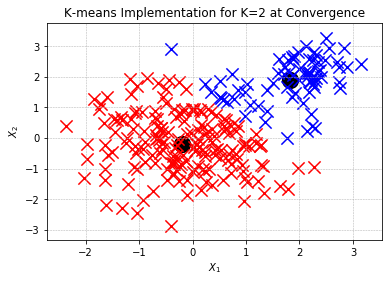

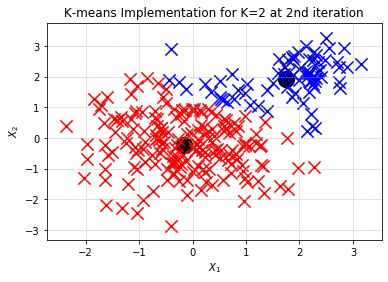

In [181]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import random as rd

######### Define the class for K-means of full convergence iterations ################

class K_Mean_convergence:
    def __init__(self, k=2, tolerance=0.001, max_iter=1000,random_state=10):
        self.k = k
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit_the_model(self,X):
    # initialize the centroid dictionary
        self.centroids = {}

        # initialize random points from data as centroid
        for i in range(self.k):
            np.random.RandomState(self.random_state)
            random_idx = np.random.permutation(X.shape[0])
            self.centroids[i] = X[random_idx[:self.k]]
            
        # Initialize the classiffications' dictionary
        for i in range(self.max_iter):
            self.classifications = {}
             
            for i in range(self.k):
                self.classifications[i] = []
           
        # Find the Euclidean distance 
            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        
        # Find the minimum distance to cluster's index for classification
                classification_index = distances.index(min(distances))
            
             # Assign each x(n) to its closest mu(k)
                self.classifications[classification_index].append(featureset)
           
        # Store the previous centroids in the dictionary
            previous_centroids = dict(self.centroids)
            
        # Cluster means updated to average of assigned points.
            for classification_index in self.classifications:
                self.centroids[classification_index] = np.average(self.classifications[classification_index],axis=0)

        # Start the iterative procedure. 
            converged = True
            
        # Update the centroids
            for c in self.centroids:
                original_centroid = previous_centroids[c]
                updated_centroid = self.centroids[c]
                
              
        # Define if the centroid is optimized, if it is already at convergence, break the loop
                if np.sum((updated_centroid-original_centroid)/original_centroid*100.0) > self.tolerance:
                    converged = False
            if converged:
                break
                
        return random_idx 
                
############ Taking the same initialized random set in previous class, do K-means only for 2 iterations #####
class K_Mean_2nd :
    def __init__(self, k=2, tolerance=0.001, max_iter=2):
        self.k = k
        self.tolerance = tolerance
        self.max_iter = max_iter
       
        
    def fit_the_model(self,X,random_idx):
    # initialize the centroid dictionary
        self.centroids = {}

        # initialize random points from data as centroid
        for i in range(self.k):
            self.centroids[i] = X[random_idx[:self.k]]
        
        # Initialize the classiffications' dictionary
        for i in range(self.max_iter):
            self.classifications = {}
             
            for i in range(self.k):
                self.classifications[i] = []
           
        # Find the Euclidean distance 
            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        
        # Find the minimum distance to cluster's index for classification
                classification_index = distances.index(min(distances))
            
             # Assign each x(n) to its closest mu(k)
                self.classifications[classification_index].append(featureset)
           
        # Store the previous centroids in the dictionary
            previous_centroids = dict(self.centroids)
            
        # Cluster means updated to average of assigned points.
            for classification_index in self.classifications:
                self.centroids[classification_index] = np.average(self.classifications[classification_index],axis=0)

        # Start the iterative procedure. 
            converged = True
            
        # Update the centroids
            for c in self.centroids:
                original_centroid = previous_centroids[c]
                updated_centroid = self.centroids[c]
                
              
        # Define if the centroid is optimized, if it is already at convergence, break the loop
                if np.sum((updated_centroid-original_centroid)/original_centroid*100.0) > self.tolerance:
                    converged = False
            if converged:
                break
            
# Call the defined class algorithm
mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2

# Fit the model at convergence
model = K_Mean_convergence()
model.fit_the_model(X)

# Fit the model at convergence
model2 = K_Mean_convergence()
model2.fit_the_model(X)



plt.figure(1)

# Plot the two centroids at convergence
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
    
print('Centroids at Convergence',model.centroids)

# Plot the centroid and the two clusters at convergence
for classification_index in model.classifications:
    colors=['red','blue']
    color = colors[classification_index]
    
    for featureset in model.classifications[classification_index]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        plt.xlabel('$X_{1}$')
        plt.ylabel('$X_{2}$')
        plt.grid(linestyle='--', linewidth=0.5)
        plt.title('K-means Implementation for K=2 at Convergence') 

plt.figure(2)

# Plot the two centroids at convergence
for centroid in model2.centroids:
    plt.scatter(model2.centroids[centroid][0], model2.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
    
print('Centroids at 2nd iteration',model2.centroids)

for classification_index in model2.classifications:
    colors=['red','blue']
    color = colors[classification_index]
    
    for featureset in model2.classifications[classification_index]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        plt.xlabel('$X_{1}$')
        plt.ylabel('$X_{2}$')
        plt.grid(linestyle='--', linewidth=0.5)
        plt.title('K-means Implementation for K=2 at 2nd iteration')         
        
plt.show()




# GMM [4 pts]

We will now consider mixture model. The probability of an observation $x \in \mathbb{R}^D$ is given by: $$p(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k)$$ where $\pi_k$ are the probabilities a priori and $P(x|\theta_k)$ are multi-dimensional Gaussian characterized by their mean $\mu_k$ and their co-variance matrix $\Sigma_k$
, i.e. $\theta_k = (\mu_k, \Sigma_k)$.

### Q 2.1.
Plot the probability distribution $p(x)$ for D=1 , K = 2, $\pi_1 = \pi_2 = 0.5$ and $\mu_1 = 1$, $\mu_2 = 3$,$\Sigma_1 = 1$,$ \Sigma_2 = 10$. **[2 pts]**

### Q 2.2.

What is the posterior probability that an example $x=1.5$ was produced by the Gaussian $k=1$,i.e. $P(\theta_1| x)$ ? **[2 pts]**

### Your answer here:



In [ ]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt

### Q.2.1. Answer

# Initial values for the dimension of x and 
D = 1
K= 2

# Initial values of the mixing coefficient for both k
pi = 0.5

# Initial values of the mean
mu1 = 1
mu2 = 3

# Initial values of the covariance matrix
Sigma1 = 1
Sigma2 = 10

# Assume x as 0<x<5
x = np.linspace(0, 5, 10, endpoint=False)

# Calculate the probability distribution
y1 = pi*multivariate_normal.pdf(x, mean=mu1, cov=Sigma1)
y2 = pi*multivariate_normal.pdf(x, mean=mu2, cov=Sigma2)
y = y1+y2
y_norm = np.sum(y)

# Normalize the probability distribution
final_y = y/y_norm

# Plot the pdf
print(y)
plt.plot(x,final_y)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Probability Distribution Function p(x) Plot')
plt.grid(linestyle='--', linewidth=0.5)
### Q.2.2. Answer
x_new = 1.5
y1_new =  pi*multivariate_normal.pdf(x_new, mean=mu1, cov=Sigma1)
y2_new = pi*multivariate_normal.pdf(x_new, mean=mu2, cov=Sigma2)
y_new = y1_new + y2_new

posterior_theta1_x = y1_new/y_new
print('Posterior probability for k=1 and x=1.5 is =',posterior_theta1_x)

# EM algorithm for GMM [8 pts]

Assume that the property prices of Gotheburg follow a mixture of 2 Gaussians, of respective parameters $(\mu_1, \sigma_1^2)$ and $(\mu_2, \sigma_2^2)$.

The table below lists the prices in million SEK of some real estate transactions:
$$\begin{array}{|c|c|c|c|}
\hline
8& 1 & 4 & 3 & 4 & 5 & 7 & 5 & 3 & 5 \\ \hline
\end{array}$$

We will call $\pi_1$ and $\pi_2$ the coefficients of the two Gaussians in the mixture. Note: $\theta^{i}$ denotes $i^{th}$ step estimate when using EM algorithm.

### Q 3.1.

Sort the items of the sample in ascending order and use the 5 smallest values for
estimating $(\mu_1, \sigma_1^2)$ and 5 larger ones to estimate $(\mu_2, \sigma_2^2)$. Under these conditions, what values should logically be assigned to the weights $\pi_1$ and $\pi_2$? **[2 pts]**


### Q 3.2.

Starting from $\theta^0 = \{\mu_1, \sigma^2_1, \pi_1, \mu_2, \sigma^2_2, \pi_2\}$ obtained from the previous question, estimate the value of responsibilities $\gamma(z_{nk})$ according to the EM algorithm. **[3 pts]**

### Q 3.3.
Re-estimate the parameters i.e. calculate $\theta^1$, using the current responsibilities.**[3 pts]**

### Your answer here:
Please take a look at the Python code below these answers

### Q 3.1.

The items sorted in ascending order is as shown as below 

$$\begin{array}{|c|c|c|c|}
\hline
1& 3 & 3 & 4 & 4 & 5 & 5 & 5 & 7 & 8 \\ \hline
\end{array}$$

Hence, since we have 5 values for class 1 and 5 values for class 2, the mixing coefficient can be calculated

$$ \pi_{1} = \frac{N_{k}}{N} = \frac{N_{1}}{N} = \frac{5}{10} = 0.5 $$

$$ \pi_{2} = \frac{N_{k}}{N} = \frac{N_{2}}{N} = \frac{5}{10} = 0.5 $$

and the estimation of the parameters without responsbilities ($\gamma$)is shown in the code below and mathematically expressed as

$$ \hat{\mu}_{k} = \frac{1}{N_{k}} \sum_{n=1}^{N} x_{n}  $$

$$ \hat{\sigma}_{k}^{2} = \frac{1}{N_{k}} \sum_{i=1}^{N} (x_{n}-\mu_{k})(x_{n}-\mu_{k})^{T} $$

$$ \theta^{0} = \{\mu_{1},\sigma_{1}^{2},\pi_{1},\mu_{2},\sigma_{2}^{2},\pi_{2}\} = \{3.0,6.0,0.5,1.2,1.6,0.5\} $$


### Q 3.2.

The value of responsbilities $\gamma(z_{nk})$ could be expressed mathematically as

$$ \gamma(z_{nk}) = \frac{\pi_{k}\mathcal{N}(x_{n}|\mu_{k},\Sigma_{k})}{\sum_{j}\;\pi_{j}\mathcal{N}(x_{n}|\mu_{j},\Sigma_{j})} $$

The responsbility for each data in a specific class is therefore

$$ \gamma(z_{n1}) = \{0.000122, 0.998, 0.727, 0.951, 0.727, 0.230, 0.00201, 0.230, 0.951, 0.230\}$$
$$ \gamma(z_{n2}) = \{0.9999, 0.00185, 0.273, 0.049, 0.273, 0.770, 0.998, 0.77, 0.049, 0.770\}$$



### Q 3.3.

The re-estimation of the parameters using the current responsibilities could be calculated using the formula below

$$ \hat{\mu}_{k} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma(z_{nk})x_{n},\;\; N_{k} = \sum_{n=1}^{N} \gamma(z_{nk}) $$

$$ \hat{\Sigma}_{k} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma(z_{nk})\left((x_{n}-\mu_{k})(x_{n}-\mu_{k})^{T}\right) $$

$$ \pi_{k} = \frac{N_{k}}{N} $$

If we denote all these parameters as $\theta_{1}$, then we will get

$$\theta_{1} = \{\mu_1, \sigma^2_1, \pi_1, \mu_2, \sigma^2_2, \pi_2\}= \{3.167,54.263,0.504,5.856,54.891,0.496\} $$

In [ ]:
import numpy as np

a = [1,3,3,4,4]
b = [5,5,5,7,8]
X = [8,1,4,3,4,5,7,5,3,5]

### Q.3.1
# Calculate the means
mu1 = np.mean(a)
mu2 = np.mean(b)

# Calculate the variances
var1 = np.var(a)
var2 = np.var(b)

# The mixing coefficient
pi = 0.5

#### Q.3.2.
# Calculate the responsbilities
gamma_1_num =  pi*multivariate_normal.pdf(X, mean=mu1, cov=var1)
gamma_2_num =  pi*multivariate_normal.pdf(X, mean=mu2, cov=var2)
gamma_denom =  gamma_1_num + gamma_2_num

gamma_1 = gamma_1_num/gamma_denom
gamma_2 = gamma_2_num/gamma_denom

### Q.3.3
# Reestimation of the parameters
N_1 = np.sum(gamma_1)
N_2 = np.sum(gamma_2)
N = len(X)

#mean
mu1_new = 1/N_1*np.dot(gamma_1,X)
mu2_new = 1/N_2*np.dot(gamma_2,X)
 
#Variance
var1_new = 1/N_1*np.sum(np.dot(gamma_1,np.dot((X-mu1_new),(X-mu1_new))))
var2_new = 1/N_2*np.sum(np.dot(gamma_2,np.dot((X-mu2_new),(X-mu2_new))))

# Mixing Coefficients
pi1_new = N_1/N
pi2_new = N_2/N

print('the mean of the first class is = ',mu1)
print('the mean of the second class is =', mu2)
print('the variance of the first class is =', var1)
print('the variance of the second class is =', var2)
print('the responsbility of the first class is =', gamma_1)
print('the responsibility of the second class is =', gamma_2)
print('the reestimated mean of first class is =',mu1_new)
print('the reestimated mean of second class is =',mu2_new)
print('the reestimated variance of first class is =',var1_new)
print('the reestimated variance of second class is =',var2_new)
print('the reestimated mixing coefficient of first class is =',pi1_new)
print('the reestimated mixing coefficient of second class is =',pi2_new)